In [1]:
##https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Admission_Predict.csv")
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
df.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [9]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [14]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
41,316,105,2,2.5,2.5,8.20,1
180,300,104,3,3.5,3.0,8.16,0
132,309,105,5,3.5,3.5,8.56,0


In [15]:
y_train

93     0.44
23     0.95
299    0.71
13     0.62
90     0.64
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Chance of Admit , Length: 320, dtype: float64

In [16]:
y_test

398    0.67
125    0.64
328    0.80
339    0.81
172    0.86
       ... 
347    0.42
41     0.49
180    0.71
132    0.71
224    0.67
Name: Chance of Admit , Length: 80, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [19]:
X_test_scaled

array([[0.44      , 0.34615385, 0.5       , 0.625     , 0.75      ,
        0.65562914, 0.        ],
       [0.2       , 0.23076923, 0.5       , 0.25      , 0.5       ,
        0.61589404, 1.        ],
       [0.68      , 0.69230769, 0.75      , 0.75      , 0.625     ,
        0.65231788, 1.        ],
       [0.68      , 0.5       , 1.        , 0.625     , 0.75      ,
        0.61589404, 1.        ],
       [0.64      , 0.61538462, 0.75      , 0.75      , 1.        ,
        0.77152318, 1.        ],
       [0.36      , 0.46153846, 0.5       , 0.5       , 0.5       ,
        0.47682119, 0.        ],
       [0.4       , 0.46153846, 0.25      , 0.625     , 0.375     ,
        0.50662252, 0.        ],
       [0.2       , 0.30769231, 0.25      , 0.125     , 0.25      ,
        0.35430464, 0.        ],
       [0.4       , 0.19230769, 0.25      , 0.125     , 0.25      ,
        0.16556291, 0.        ],
       [1.        , 0.69230769, 0.75      , 1.        , 0.875     ,
        0.94701987, 1. 

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [24]:
history = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10

8/8 [==============================] - 1s 32ms/step - loss: 1.3186 - val_loss: 1.3571
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 1.0718 - val_loss: 1.0988
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.8573 - val_loss: 0.8868
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.6958 - val_loss: 0.7086
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5561 - val_loss: 0.5682
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.4454 - val_loss: 0.4589
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.3637 - val_loss: 0.3705
Epoch 8/10
8/8 [==============================] - 0s 8ms/step - loss: 0.2981 - val_loss: 0.3013
Epoch 9/10
8/8 [==============================] - 0s 8ms/step - loss: 0.2449 - val_loss: 0.2488
Epoch 10/10
8/8 [==============================] - 0s 11ms/step - loss: 0.2049 - val_loss: 0.2073


In [25]:
history.history

{'loss': [1.3185571432113647,
  1.0718340873718262,
  0.857264518737793,
  0.6957737803459167,
  0.5560941100120544,
  0.4453679323196411,
  0.3636508584022522,
  0.29807522892951965,
  0.24492496252059937,
  0.20489856600761414],
 'val_loss': [1.3570876121520996,
  1.0987513065338135,
  0.8867536783218384,
  0.7085996866226196,
  0.5681630373001099,
  0.4589044749736786,
  0.3704966902732849,
  0.30131739377975464,
  0.24878066778182983,
  0.20731136202812195]}

In [26]:
y_pred = model.predict(X_test_scaled)
y_pred

3/3 [==============================] - 0s 4ms/step


array([[0.9614546 ],
       [0.9367265 ],
       [1.3210913 ],
       [1.1700436 ],
       [1.4855093 ],
       [0.70548815],
       [0.76611155],
       [0.33109272],
       [0.13567306],
       [1.7441957 ],
       [1.3561441 ],
       [1.6529313 ],
       [1.4560422 ],
       [0.5399084 ],
       [1.3488936 ],
       [0.9697823 ],
       [1.3862183 ],
       [1.4259881 ],
       [0.89432335],
       [1.0732528 ],
       [0.37226826],
       [1.3180631 ],
       [1.4701546 ],
       [1.7101109 ],
       [1.2149411 ],
       [0.76199704],
       [1.2684947 ],
       [1.2876284 ],
       [1.5197628 ],
       [1.1351329 ],
       [1.8175166 ],
       [0.54762477],
       [1.0321743 ],
       [1.330053  ],
       [1.169589  ],
       [0.9077014 ],
       [0.853574  ],
       [0.94464904],
       [1.7160164 ],
       [1.2793787 ],
       [1.3499665 ],
       [1.0639703 ],
       [1.4132107 ],
       [1.1130214 ],
       [1.7351315 ],
       [0.8272015 ],
       [1.2690089 ],
       [1.386

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-8.80835026004

# Improve Model:-

In [28]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [31]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.0453 - val_loss: 0.0452
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0386 - val_loss: 0.0378
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0330 - val_loss: 0.0325
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0282 - val_loss: 0.0291
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0246 - val_loss: 0.0254
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0215 - val_loss: 0.0218
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0191 - val_loss: 0.0194
Epoch 8/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0173 - val_loss: 0.0180
Epoch 9/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0155 - val_loss: 0.0154
Epoch 10/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 11/100
8/8 [=

8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 85/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 86/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 87/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 88/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 89/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 90/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 91/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 92/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 93/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 94/100
8/8 [============

In [32]:
history.history

{'loss': [0.045349519699811935,
  0.03857540339231491,
  0.03295839577913284,
  0.028185756877064705,
  0.02463364787399769,
  0.021548498421907425,
  0.019139572978019714,
  0.01726512424647808,
  0.01546100527048111,
  0.014069627039134502,
  0.012791176326572895,
  0.011645272374153137,
  0.010727707296609879,
  0.009799611754715443,
  0.008987155742943287,
  0.008308496326208115,
  0.007540359161794186,
  0.0069847991690039635,
  0.006494480185210705,
  0.006271454971283674,
  0.006003912538290024,
  0.005816279910504818,
  0.005716064944863319,
  0.00559599231928587,
  0.005501507315784693,
  0.005424643866717815,
  0.005326432175934315,
  0.005239827558398247,
  0.005188708659261465,
  0.005120323970913887,
  0.005110731348395348,
  0.004986220505088568,
  0.00503369327634573,
  0.005003522615879774,
  0.004991097375750542,
  0.004955652169883251,
  0.004871700890362263,
  0.004863532725721598,
  0.004800841677933931,
  0.004774398636072874,
  0.004750310909003019,
  0.0047163460

In [33]:
y_pred = model.predict(X_test_scaled)
y_pred

3/3 [==============================] - 0s 0s/step


array([[0.7337353 ],
       [0.7050129 ],
       [0.8195321 ],
       [0.82500136],
       [0.8627628 ],
       [0.66303104],
       [0.68356997],
       [0.59251404],
       [0.53573763],
       [0.90180343],
       [0.8390916 ],
       [0.94381857],
       [0.9106039 ],
       [0.6716192 ],
       [0.7152765 ],
       [0.74274886],
       [0.80628455],
       [0.9001443 ],
       [0.5003216 ],
       [0.7309311 ],
       [0.70548236],
       [0.806311  ],
       [0.8411912 ],
       [0.9296702 ],
       [0.6780719 ],
       [0.5804753 ],
       [0.7215772 ],
       [0.72518766],
       [0.90943795],
       [0.6769061 ],
       [0.95198625],
       [0.6666285 ],
       [0.8281841 ],
       [0.78646016],
       [0.7407986 ],
       [0.6895384 ],
       [0.5213138 ],
       [0.69184625],
       [0.91242254],
       [0.8534634 ],
       [0.8431244 ],
       [0.6901632 ],
       [0.9227291 ],
       [0.68674004],
       [0.9907099 ],
       [0.72328055],
       [0.7497581 ],
       [0.846

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7612641676270959

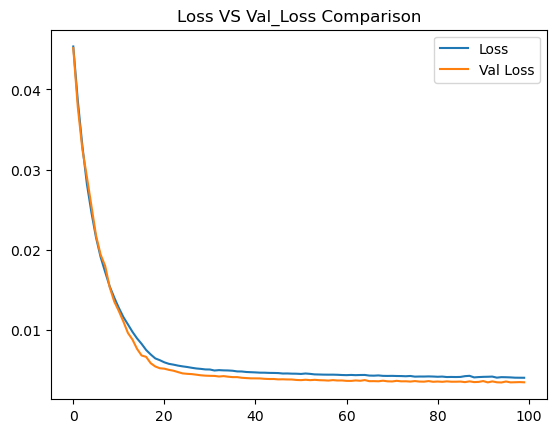

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="Val Loss")
plt.title("Loss VS Val_Loss Comparison")
plt.legend()